<a href="https://colab.research.google.com/github/VanesaHM/ProyectoKaggle/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UDEA/ai4eng 20252 - Pruebas Saber Pro Colombia**

Crear un modelo para predecir el rendimiento de los estudiantes en las pruebas Saber Pro

# **Descripción general**

Las Pruebas Saber Pro son exámenes estandarizados que se administran en Colombia para evaluar la calidad y el nivel de conocimiento y competencias de los estudiantes de educación superior, es decir, de instituciones de educación superior como universidades y tecnológicos. Estas pruebas son parte de los esfuerzos del Gobierno de Colombia para monitorear y mejorar la calidad de la educación superior en el país.

Estas Pruebas constan cinco componentes genéricos, Inglés, Lectura Crítica, Competencias Ciudadanas, Razonamiento Cuantitativo y Comunicación Escrita.

Tu tarea será crear un modelo de clasificación que para cada estudiante prediga qué desempeño va a tener: bajo, medio-bajo, medio-alto o alto.

# **Descripción**

El conjunto de datos contiene más de 50 columnas que describen de manera distintos aspectos de cada estudiante, incluyendo:

Información socieconómica: Describen características socieconómicas del estudiante como su estrato, educación de sus padres, estrato, entre otras.

Información de instituciones: Describen las instituciones de donde provienen los estudiantes.

Información del estudiante: Describe particularidades del estudiante como su edad, que programa estudian, la modalidad de estudio, etc.

Información estadística: Describe algunos coeficientes que equipos de estudio han desarrollado que podría ayudar a la clasificación.

Así como muchos otros datos que ayudan a clasificar de manera precisa los niveles de desempeño

### **ENTREGA 2**



**1. Importar librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

**2. Configuración visual**

In [ ]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")

**3. Cargar los datos**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


**4. Descomprimir los datos**

In [ ]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
train = pd.read_csv("train.csv")

# **ANÁLISIS EXPLORATORIO INICIAL**

**Mostrar las dimensiones del dataset train.**

Este archivo contiene todas las columnas que describen al estudiante, junto con las etiquetas de clasificación de desempeño RENDIMIENTO_GLOBAL, y el ID de cada estudiante ID

In [ ]:
print("Dimensiones del dataset de entrenamiento:", train.shape)

Dimensiones del dataset de entrenamiento: (692500, 21)


**Visualización general de los datos**

In [ ]:
display(train.head())

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


**Información general**

In [ ]:
print("\nInformación general del dataset:\n")
train.info()


Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO  

1. El dataset contiene 21 columnas, de las cuales:

- 2 son numéricas enteras (int64),un identificador y un códigos (ID, PERIODO_ACADEMICO).

- 4 son numéricas continuas (float64), (INDICADOR_1, INDICADOR_2, INDICADOR_3, INDICADOR_4) que parecen índices estadísticos o variables derivadas útiles para la predicción, que pueden ser los resultados de las diferentes asignaturas que contempla las pruebas saber PRO

- 15 son categóricas (object), variables como E_PRGM_ACADEMICO, F_EDUCACIONPADRE, F_TIENEAUTOMOVIL, etc, que representan características socioeconómicas o contextuales del estudiante.

2. Varias columnas tienen valores nulos, especialmente las socioeconómicas:

Ejemplo:

E_HORASSEMANATRABAJA: 661,643 / 692,500, 4.46% faltantes.

F_TIENEAUTOMOVIL: 648,877 / 692,500, 6.3% faltantes.

F_TIENELAVADORA: 652,727 / 692,500, 5.7% faltantes.

Esto sugiere que habrá que tratar valores faltantes durante el preprocesamiento.

3. Se observa una columna repetida: F_TIENEINTERNET y F_TIENEINTERNET.1.

Esto indica que posiblemente se duplicó una variable al combinar bases de datos.

Habrá que revisar si son idénticas, si es así se debe eliminar una de ellas

In [ ]:
print("\nColumnas con valores faltantes:")
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing.head(20))


Columnas con valores faltantes:


,0
F_TIENEAUTOMOVIL,43623
F_TIENELAVADORA,39773
F_TIENECOMPUTADOR,38103
F_ESTRATOVIVIENDA,32137
E_HORASSEMANATRABAJA,30857
F_TIENEINTERNET.1,26629
F_TIENEINTERNET,26629
F_EDUCACIONMADRE,23664
F_EDUCACIONPADRE,23178
E_PAGOMATRICULAPROPIO,6498


**Exploracón de la variable objetivo**

In [ ]:
print("\nDistribución de la variable objetivo (RENDIMIENTO_GLOBAL):")
display(train["RENDIMIENTO_GLOBAL"].value_counts())
display(train['RENDIMIENTO_GLOBAL'].value_counts(normalize=True))


Distribución de la variable objetivo (RENDIMIENTO_GLOBAL):


,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


,proportion
RENDIMIENTO_GLOBAL,
alto,0.253601
bajo,0.249801
medio-bajo,0.248773
medio-alto,0.247825


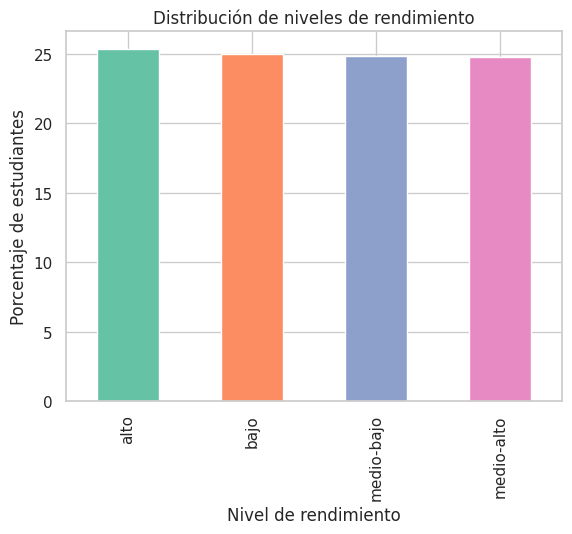

In [ ]:
# Porcentaje
train["RENDIMIENTO_GLOBAL"].value_counts(normalize=True).mul(100).round(2).plot(
    kind='bar', color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
)
plt.title("Distribución de niveles de rendimiento")
plt.xlabel("Nivel de rendimiento")
plt.ylabel("Porcentaje de estudiantes")
plt.show()

# **PREPROCESAMIENTO**

In [ ]:
train_processed = train.copy()

**ELIMINAR COLUMNAS DUPLICADAS**

In [ ]:
print("\nEliminando columnas duplicadas...")

# F_TIENEINTERNET.1 es duplicado de F_TIENEINTERNET
if 'F_TIENEINTERNET.1' in train_processed.columns:
    train_processed.drop('F_TIENEINTERNET.1', axis=1, inplace=True)
    print("  ✓ Eliminada columna duplicada: F_TIENEINTERNET.1")



Eliminando columnas duplicadas...
  ✓ Eliminada columna duplicada: F_TIENEINTERNET.1


**SEPARAR VARIABLES NUMÉRICAS Y CATEGÓRICAS**

In [ ]:
print("\nIdentificando tipos de variables...")

# Variables que NO se deben procesar
id = ['ID']
rendimiento = 'RENDIMIENTO_GLOBAL'

# Variables numéricas (INDICADORES)
variables_numericas = ['PERIODO_ACADEMICO','INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']

# Variables categóricas (todas las demás excepto ID y rendimiento)
variables_categoricas = [col for col in train_processed.columns
                   if col not in id + [rendimiento] + variables_numericas]

print(f"  ✓ Variables numéricas: {len(variables_numericas)}")
print(f"    {variables_numericas}")
print(f"  ✓ Variables categóricas: {len(variables_categoricas)}")
print(f"    {variables_categoricas}")


Identificando tipos de variables...
  ✓ Variables numéricas: 5
    ['PERIODO_ACADEMICO', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']
  ✓ Variables categóricas: 13
    ['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_EDUCACIONMADRE']


**IMPUTACIÓN DE VALORES FALTANTES - VARIABLES CATEGÓRICAS**

In [ ]:
print("\nImputando valores faltantes en variables categóricas...")

# Estrategia especial para F_ESTRATOVIVIENDA
if 'F_ESTRATOVIVIENDA' in variables_categoricas and train_processed['F_ESTRATOVIVIENDA'].isnull().sum() > 0:
    print("\n  Aplicando imputación inteligente para F_ESTRATOVIVIENDA...")

    # Variables relacionadas con estrato socioeconómico
    variables_relacionadas = [
        'F_TIENEAUTOMOVIL', 'F_TIENECOMPUTADOR', 'F_TIENELAVADORA',
        'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_EDUCACIONMADRE',
        'E_VALORMATRICULAUNIVERSIDAD'
    ]

    # Crear variables temporales codificadas
    df_temp = train_processed.copy()
    for col in variables_relacionadas:
        if col in df_temp.columns:
            le_temp = LabelEncoder()
            mask = df_temp[col].notna()
            if mask.sum() > 0:
                df_temp.loc[mask, col + '_encoded'] = le_temp.fit_transform(df_temp.loc[mask, col])

    # Mapear estrato a valores numéricos
    estrato_map = {
        'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3,
        'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6
    }
    estrato_reverse_map = {v: k for k, v in estrato_map.items()}

    mask_estrato_known = df_temp['F_ESTRATOVIVIENDA'].notna()
    if mask_estrato_known.sum() > 0:
        df_temp.loc[mask_estrato_known, 'F_ESTRATOVIVIENDA_num'] = df_temp.loc[mask_estrato_known, 'F_ESTRATOVIVIENDA'].map(estrato_map)

    # Usar KNN Imputer
    from sklearn.impute import KNNImputer

    cols_for_imputation = ['F_ESTRATOVIVIENDA_num'] + [c + '_encoded' for c in variables_relacionadas if c + '_encoded' in df_temp.columns]
    cols_available = [c for c in cols_for_imputation if c in df_temp.columns]

    if len(cols_available) > 1 and 'F_ESTRATOVIVIENDA_num' in cols_available:
        # Usar solo un sample para entrenar el imputer
        print("    Entrenando KNN con muestra de 50,000 registros...")

        # Tomar muestra estratificada
        sample_size = 50000
        df_sample = df_temp[cols_available].sample(n=min(sample_size, len(df_temp)), random_state=42)

        # Entrenar imputer con la muestra
        imputer = KNNImputer(n_neighbors=5, weights='distance')
        imputer.fit(df_sample)

        # Aplicar a TODO el dataset
        print("    Aplicando imputación a todo el dataset...")
        df_temp[cols_available] = imputer.transform(df_temp[cols_available])

        # Redondear y mapear de vuelta
        df_temp['F_ESTRATOVIVIENDA_num'] = df_temp['F_ESTRATOVIVIENDA_num'].round().clip(1, 6)
        mask_missing = train_processed['F_ESTRATOVIVIENDA'].isnull()
        train_processed.loc[mask_missing, 'F_ESTRATOVIVIENDA'] = df_temp.loc[mask_missing, 'F_ESTRATOVIVIENDA_num'].map(estrato_reverse_map)

        print(f"  ✓ F_ESTRATOVIVIENDA: imputado con KNN basado en variables socioeconómicas")
    else:
        # usar moda
        moda = train_processed['F_ESTRATOVIVIENDA'].mode()[0]
        train_processed['F_ESTRATOVIVIENDA'].fillna(moda, inplace=True)
        print(f"  ✓ F_ESTRATOVIVIENDA: imputado con moda = {moda}")

# Para el resto de variables categóricas
for col in variables_categoricas:
    if col != 'F_ESTRATOVIVIENDA' and train_processed[col].isnull().sum() > 0:
        # Variables binarias (Si/No): usar moda
        if train_processed[col].nunique() <= 3:
            moda = train_processed[col].mode()[0]
            train_processed[col].fillna(moda, inplace=True)
            print(f"  ✓ {col}: imputado con moda = {moda}")
        else:
            train_processed[col].fillna('Desconocido', inplace=True)
            print(f"  ✓ {col}: imputado con 'Desconocido'")


Imputando valores faltantes en variables categóricas...

  Aplicando imputación inteligente para F_ESTRATOVIVIENDA...
    Entrenando KNN con muestra de 50,000 registros...
    Aplicando imputación a todo el dataset...
  ✓ F_ESTRATOVIVIENDA: imputado con KNN basado en variables socioeconómicas
  ✓ E_VALORMATRICULAUNIVERSIDAD: imputado con 'Desconocido'


/tmp/ipython-input-4272623084.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_processed[col].fillna('Desconocido', inplace=True)


  ✓ E_HORASSEMANATRABAJA: imputado con 'Desconocido'
  ✓ F_TIENEINTERNET: imputado con moda = Si


/tmp/ipython-input-4272623084.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_processed[col].fillna(moda, inplace=True)


  ✓ F_EDUCACIONPADRE: imputado con 'Desconocido'
  ✓ F_TIENELAVADORA: imputado con moda = Si
  ✓ F_TIENEAUTOMOVIL: imputado con moda = No
  ✓ E_PAGOMATRICULAPROPIO: imputado con moda = No
  ✓ F_TIENECOMPUTADOR: imputado con moda = Si
  ✓ F_EDUCACIONMADRE: imputado con 'Desconocido'


**IMPUTACIÓN DE VALORES FALTANTES - VARIABLES NUMÉRICAS**

No es necesario realizar imputación de datos numéricos, ya que todas las variables de este tipo cuentan con la totalidad de sus valores completos.

**CODIFICACIÓN ONE-HOT PARA VARIABLES CATEGÓRICAS**

In [ ]:
print("\nAplicando codificación One-Hot a variables categóricas...")

# Guardar columnas que no se van a codificar
cols_to_keep = id + variables_numericas + [rendimiento]
df_keep = train_processed[cols_to_keep].copy()

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(
    train_processed[variables_categoricas],
    columns=variables_categoricas,
    prefix=variables_categoricas,
    drop_first=True,  # Evitar multicolinealidad
    dtype='uint8'
)

print(f"  ✓ Columnas antes de One-Hot: {len(variables_categoricas)}")
print(f"  ✓ Columnas después de One-Hot: {df_encoded.shape[1]}")
print(f"  ✓ Tipo de datos: {df_encoded.iloc[:, 0].dtype}")  # Verificar que sea uint8

# Combinar todo
df_processed = pd.concat([df_keep, df_encoded], axis=1)

print(f"  ✓ Dimensiones finales: {df_processed.shape}")


Aplicando codificación One-Hot a variables categóricas...
  ✓ Columnas antes de One-Hot: 13
  ✓ Columnas después de One-Hot: 1026
  ✓ Tipo de datos: uint8
  ✓ Dimensiones finales: (692500, 1033)


**NORMALIZACIÓN DE VARIABLES NUMÉRICAS**

In [ ]:
print("\nNormalizando variables numéricas...")

scaler = StandardScaler()
df_processed[variables_numericas] = scaler.fit_transform(df_processed[variables_numericas])

print("  ✓ Variables normalizadas (media=0, std=1)")
print(f"\n  Estadísticas después de normalización:")
print(df_processed[variables_numericas].describe())


Normalizando variables numéricas...
  ✓ Variables normalizadas (media=0, std=1)

  Estadísticas después de normalización:
       PERIODO_ACADEMICO   INDICADOR_1   INDICADOR_2   INDICADOR_3  \
count       6.925000e+05  6.925000e+05  6.925000e+05  6.925000e+05   
mean        6.243973e-14 -1.178013e-16 -1.450533e-16  2.177513e-15   
std         1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min        -1.458627e+00 -2.199542e+00 -2.781294e+00 -4.452543e+00   
25%        -3.195699e-01 -5.373728e-01 -5.134332e-01 -1.373936e-01   
50%        -3.195699e-01 -2.344159e-01  1.177168e-01  2.363596e-01   
75%         4.398015e-01  3.714978e-01  5.242203e-01  5.251688e-01   
max         1.389016e+00  3.179990e+00  2.428368e+00  9.838658e-01   

        INDICADOR_4  
count  6.925000e+05  
mean  -7.410679e-16  
std    1.000001e+00  
min   -3.869422e+00  
25%   -1.163206e-01  
50%    3.252207e-01  
75%    5.901454e-01  
max    1.016969e+00  


**CODIFICAR VARIABLE OBJETIVO**

In [ ]:
print("\nCodificando variable objetivo...")

# Verificar valores únicos
print(f"  Valores únicos en RENDIMIENTO_GLOBAL: {df_processed[rendimiento].unique()}")

# Codificar la variable objetivo
le = LabelEncoder()
df_processed['RENDIMIENTO_GLOBAL_ENCODED'] = le.fit_transform(df_processed[rendimiento])

# Mostrar mapeo
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"  ✓ Mapeo de clases: {mapping}")



Codificando variable objetivo...
  Valores únicos en RENDIMIENTO_GLOBAL: ['medio-alto' 'bajo' 'alto' 'medio-bajo']
  ✓ Mapeo de clases: {'alto': np.int64(0), 'bajo': np.int64(1), 'medio-alto': np.int64(2), 'medio-bajo': np.int64(3)}


**ANÁLISIS POST-PROCESAMIENTO**

In [ ]:
print("ANÁLISIS POST-PROCESAMIENTO")

print(f"\nDimensiones finales: {df_processed.shape}")
print(f"Valores faltantes: {df_processed.isnull().sum().sum()}")
print(f"\nColumnas finales: {df_processed.columns.tolist()}")

print("\nPrimeras filas del dataset procesado:")
print(df_processed.head())

Se han truncado las últimas 5000 líneas del flujo de salida.
3                                          0   
4                                          0   

   E_PRGM_ACADEMICO_COMUNICACIÓN AUDIOVISUAL Y DIGITAL  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   E_PRGM_ACADEMICO_COMUNICACIÓN CORPORATIVA  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   E_PRGM_ACADEMICO_COMUNICACIÓN CORPORATIVA Y RELACIONES PÚBLICAS  \
0                                                  0                 
1                                                  0            

**GUARDAR DATOS PROCESADOS**

In [ ]:
print("GUARDANDO DATOS PROCESADOS")

output_file = 'train_processed.parquet'
df_processed.to_parquet(output_file, index=False, compression='snappy')
print(f"  ✓ Dataset procesado guardado en: {output_file}")

import pickle

scaler_file = 'scaler.pkl'
with open(scaler_file, 'wb') as f:
    pickle.dump(scaler, f)
print(f"  ✓ Scaler guardado en: {scaler_file}")

le_file = 'label_encoder.pkl'
with open(le_file, 'wb') as f:
    pickle.dump(le, f)
print(f"  ✓ Label Encoder guardado en: {le_file}")

columns_file = 'processed_columns.pkl'
with open(columns_file, 'wb') as f:
    pickle.dump(df_processed.columns.tolist(), f)
print(f"  ✓ Lista de columnas guardada en: {columns_file}")

print("PREPROCESAMIENTO COMPLETADO ✓")

# Mostrar información del archivo guardado
import os
file_size = os.path.getsize(output_file) / (1024 * 1024)  # MB
print(f"\n Tamaño del archivo: {file_size:.2f} MB")


GUARDANDO DATOS PROCESADOS
  ✓ Dataset procesado guardado en: train_processed.parquet
  ✓ Scaler guardado en: scaler.pkl
  ✓ Label Encoder guardado en: label_encoder.pkl
  ✓ Lista de columnas guardada en: processed_columns.pkl

PREPROCESAMIENTO COMPLETADO ✓

📦 Tamaño del archivo: 13.70 MB


In [ ]:
# Cargar
df = pd.read_parquet('train_processed.parquet')

df.head()

,ID,PERIODO_ACADEMICO,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,RENDIMIENTO_GLOBAL,E_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,E_PRGM_ACADEMICO_ACUICULTURA,E_PRGM_ACADEMICO_ADMINISTRACION,E_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,E_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,E_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,E_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL,E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES,E_PRGM_ACADEMICO_ADMINISTRACION BANCARIA Y FINANCIERA,E_PRGM_ACADEMICO_ADMINISTRACION COMERCIAL,E_PRGM_ACADEMICO_ADMINISTRACION COMERCIAL Y DE MERCADEO,E_PRGM_ACADEMICO_ADMINISTRACION DE COMERCIO EXTERIOR,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS Y GESTION AMBIENTAL,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS AGROPECUARIAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS COMERCIALES,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICA,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS,E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS Y FINANZAS,E_PRGM_ACADEMICO_ADMINISTRACION DE GESTISN HUMANA,E_PRGM_ACADEMICO_ADMINISTRACION DE HOTELERIA Y TURISMO,E_PRGM_ACADEMICO_ADMINISTRACION DE INSTITUCIONES DE SERVICIO,E_PRGM_ACADEMICO_ADMINISTRACION DE LA CALIDAD,E_PRGM_ACADEMICO_ADMINISTRACION DE LA SEGURIDAD SOCIAL,E_PRGM_ACADEMICO_ADMINISTRACION DE LA SEGURIDAD Y SALUD OCUPACIONAL,E_PRGM_ACADEMICO_ADMINISTRACION DE MERCADEO,E_PRGM_ACADEMICO_ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS,E_PRGM_ACADEMICO_ADMINISTRACION DE NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION DE SERVICIOS DE SALUD,E_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS,E_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS INFORMATICOS,E_PRGM_ACADEMICO_ADMINISTRACION DE SISTEMAS INFORMÁTICOS,E_PRGM_ACADEMICO_ADMINISTRACION DEL COMERCIO INTERNACIONAL,E_PRGM_ACADEMICO_ADMINISTRACION DEL MEDIO AMBIENTE,E_PRGM_ACADEMICO_ADMINISTRACION DEL TURISMO SOSTENIBLE,E_PRGM_ACADEMICO_ADMINISTRACION DEPORTIVA,E_PRGM_ACADEMICO_ADMINISTRACION EMPRESAS AGROINDUSTRIALES,E_PRGM_ACADEMICO_ADMINISTRACION EN FINANZAS Y NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION EN LOGISTICA Y PRODUCCION,E_PRGM_ACADEMICO_ADMINISTRACION EN MERCADEO Y LOGISTICA INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION EN NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACION EN SALUD,E_PRGM_ACADEMICO_ADMINISTRACION EN SALUD: ENFASIS EN GESTION DE SERVICIOS DE SALUD Y ENFASIS EN GESTION SANITARIA Y AMBIENTAL,E_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,E_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA Y DE SISTEMAS,E_PRGM_ACADEMICO_ADMINISTRACION HUMANA,E_PRGM_ACADEMICO_ADMINISTRACION INDUSTRIAL,E_PRGM_ACADEMICO_ADMINISTRACION INFORMATICA,E_PRGM_ACADEMICO_ADMINISTRACION INFORMÁTICA,E_PRGM_ACADEMICO_ADMINISTRACION LOGISTICA,E_PRGM_ACADEMICO_ADMINISTRACION MARITIMA,E_PRGM_ACADEMICO_ADMINISTRACION MARITIMA Y FLUVIAL,E_PRGM_ACADEMICO_ADMINISTRACION MARITIMA Y PORTUARIA,E_PRGM_ACADEMICO_ADMINISTRACION POLICIAL,E_PRGM_ACADEMICO_ADMINISTRACION PUBLICA,E_PRGM_ACADEMICO_ADMINISTRACION PUBLICA TERRITORIAL,E_PRGM_ACADEMICO_ADMINISTRACION TECNOLOGICA,E_PRGM_ACADEMICO_ADMINISTRACION TURISTICA,E_PRGM_ACADEMICO_ADMINISTRACION TURISTICA Y HOTELERA,E_PRGM_ACADEMICO_ADMINISTRACION TURÍSTICA,E_PRGM_ACADEMICO_ADMINISTRACION Y DIRECCION DE EMPRESAS,E_PRGM_ACADEMICO_ADMINISTRACION Y FINANZAS,E_PRGM_ACADEMICO_ADMINISTRACION Y GESTION AMBIENTAL,E_PRGM_ACADEMICO_ADMINISTRACION Y NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACI¿N DE EMPRESAS,E_PRGM_ACADEMICO_ADMINISTRACI¿N LOG¿STICA,E_PRGM_ACADEMICO_ADMINISTRACI¿N P¿BLICA,E_PRGM_ACADEMICO_ADMINISTRACIÒN DE NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ADMINISTRACIÓN AGROINDU

**USUARIO DE KAGGLE**

vanesaherreram